In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
lp=pd.read_csv('loan_prediction.csv')
lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
lp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
lp.shape

(614, 13)

In [6]:
lp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
lp['Gender']=imp.fit_transform(lp['Gender'].values.reshape(-1,1))
lp['Married']=imp.fit_transform(lp['Married'].values.reshape(-1,1))
lp['Dependents']=imp.fit_transform(lp['Dependents'].values.reshape(-1,1))
lp['Self_Employed']=imp.fit_transform(lp['Self_Employed'].values.reshape(-1,1))

In [8]:
lp['LoanAmount']=lp['LoanAmount'].replace(np.nan,lp['LoanAmount'].mean())
lp['Loan_Amount_Term']=lp['Loan_Amount_Term'].replace(np.nan,lp['Loan_Amount_Term'].mean())
lp['Credit_History']=lp['Credit_History'].replace(np.nan,lp['Credit_History'].mean())

In [9]:
lp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Male      502
Female    112
Name: Gender, dtype: int64


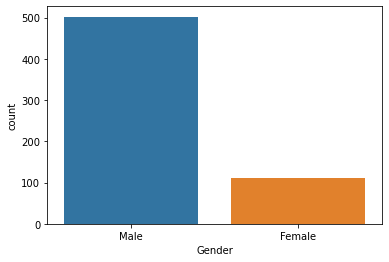

In [10]:
sns.countplot(x='Gender',data=lp)
print(lp['Gender'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


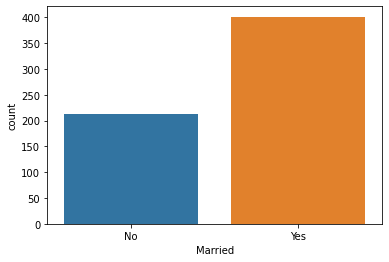

In [11]:
sns.countplot(x='Married',data=lp)
print(lp['Married'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


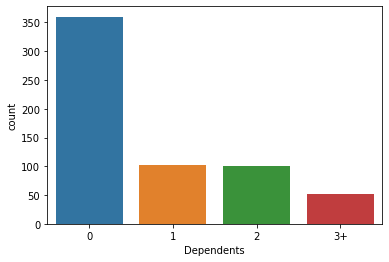

In [12]:
sns.countplot(x='Dependents',data=lp)
print(lp['Dependents'].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


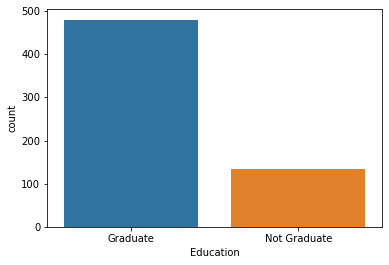

In [13]:
sns.countplot(x='Education',data=lp)
print(lp['Education'].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


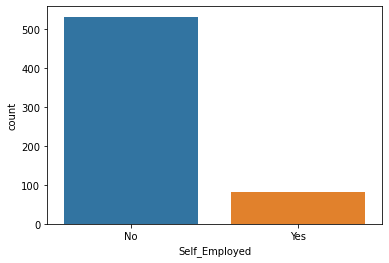

In [14]:
sns.countplot(x='Self_Employed',data=lp)
print(lp['Self_Employed'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


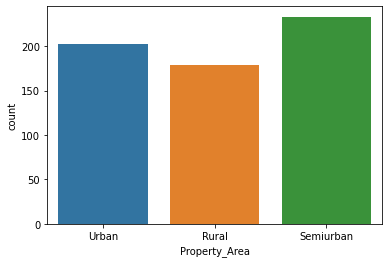

In [15]:
sns.countplot(x='Property_Area',data=lp)
print(lp['Property_Area'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


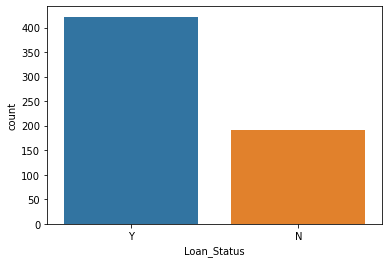

In [16]:
sns.countplot(x='Loan_Status',data=lp)
print(lp['Loan_Status'].value_counts())

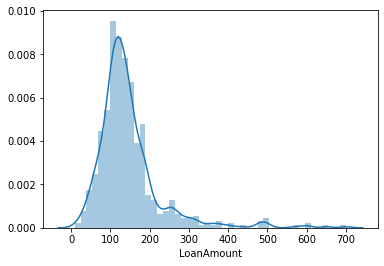

In [17]:
sns.distplot(lp['LoanAmount'],kde=True)

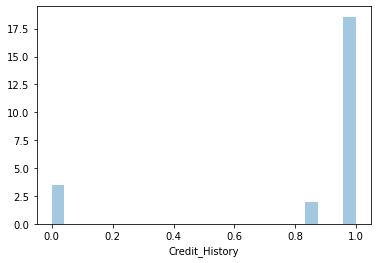

In [18]:
sns.distplot(lp['Credit_History'],kde=True)

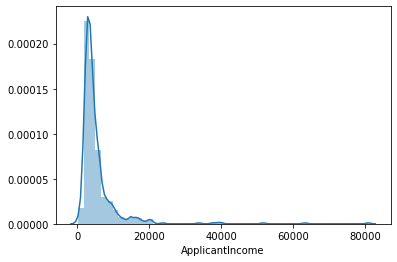

In [19]:
sns.distplot(lp['ApplicantIncome'],kde=True)

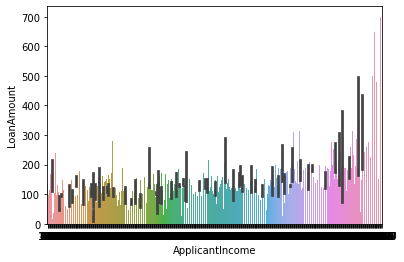

In [20]:
sns.barplot(x='ApplicantIncome',y='LoanAmount',data=lp)

In [21]:
lp.groupby('Loan_Status')['Property_Area'].value_counts()

Loan_Status  Property_Area
N            Rural             69
             Urban             69
             Semiurban         54
Y            Semiurban        179
             Urban            133
             Rural            110
Name: Property_Area, dtype: int64

In [22]:
lp.groupby('Loan_Status')['Self_Employed'].value_counts()

Loan_Status  Self_Employed
N            No               166
             Yes               26
Y            No               366
             Yes               56
Name: Self_Employed, dtype: int64

In [23]:
lp.groupby('Loan_Status')['Dependents'].value_counts()

Loan_Status  Dependents
N            0             113
             1              36
             2              25
             3+             18
Y            0             247
             2              76
             1              66
             3+             33
Name: Dependents, dtype: int64

In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in lp.columns:
    if lp[i].dtype=="object":
        lp[i]=enc.fit_transform(lp[i].values.reshape(-1,1))

In [25]:
lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [26]:
lp.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,614.0,306.500000,177.390811,0.0,153.25,306.5,459.75,613.0
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0


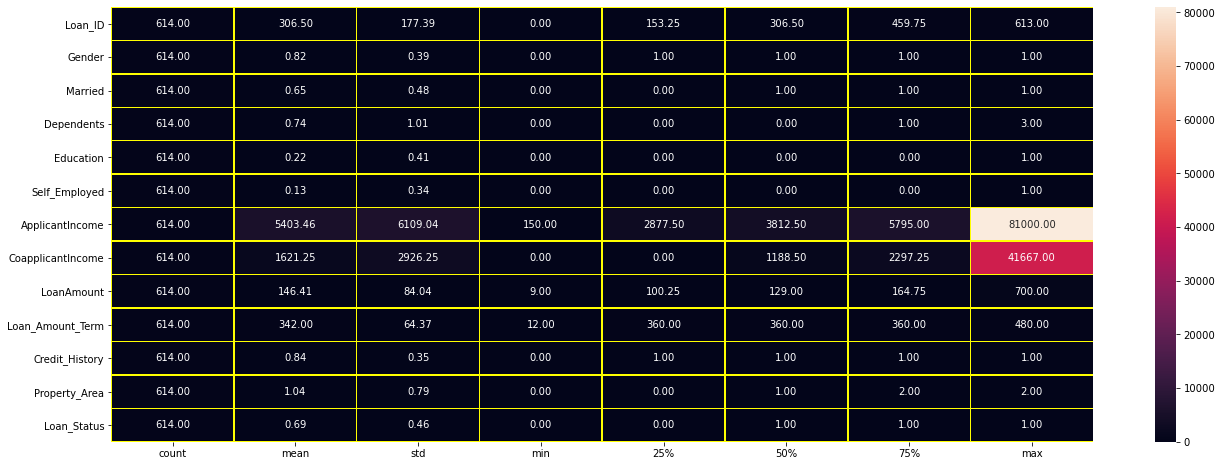

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(lp.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

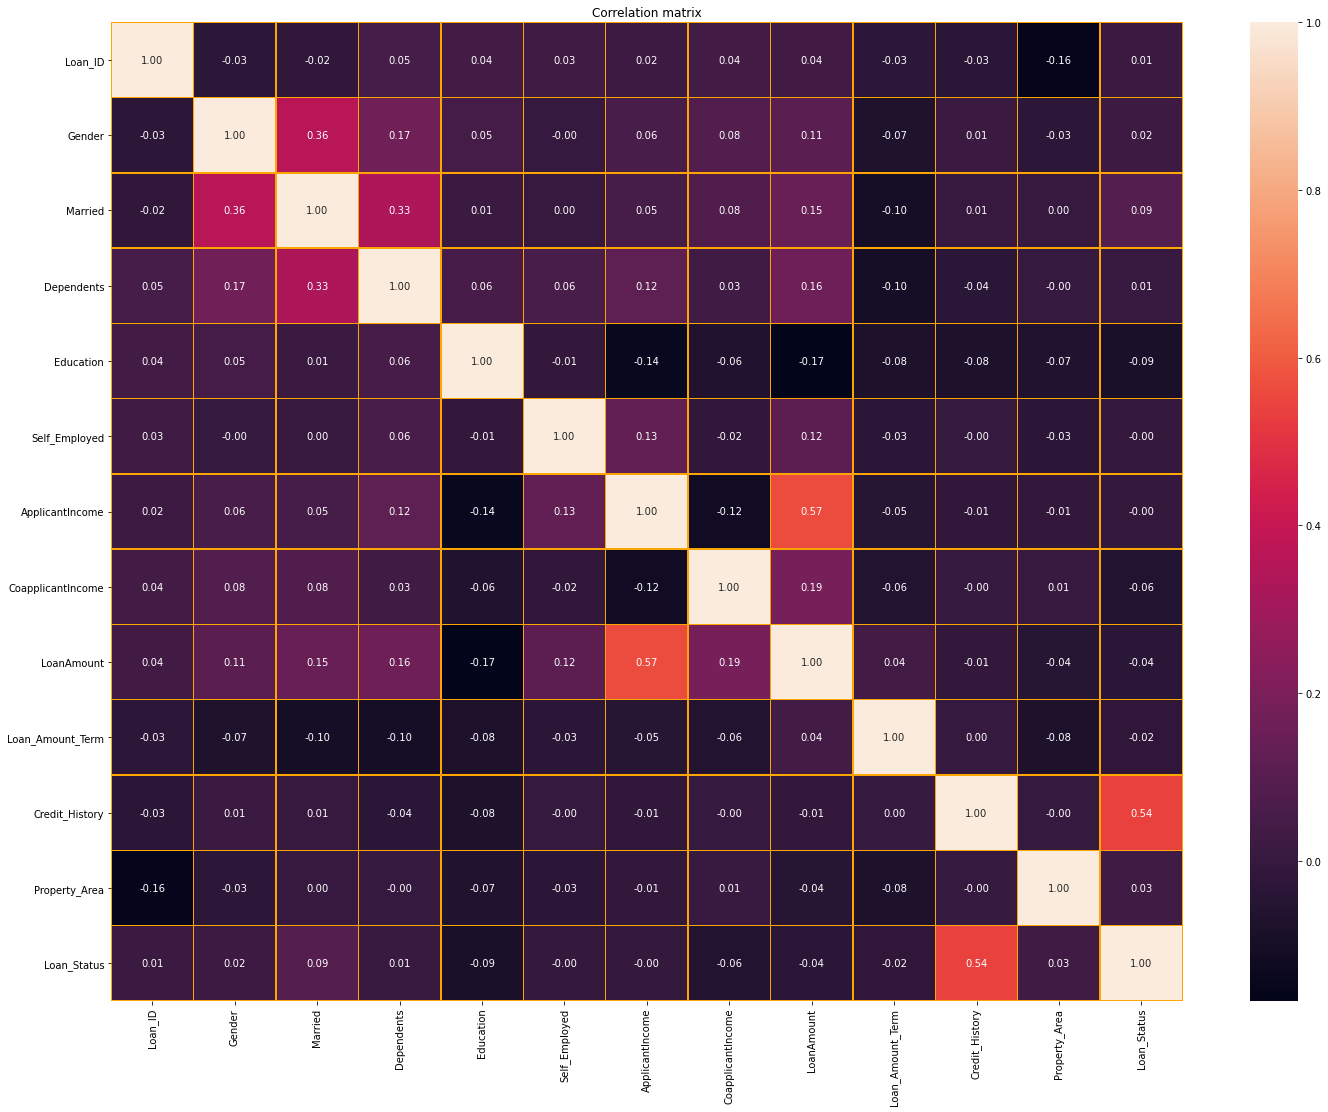

In [28]:
corr=lp.corr()                                               # multivariate analysis
plt.figure(figsize=(24,18))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

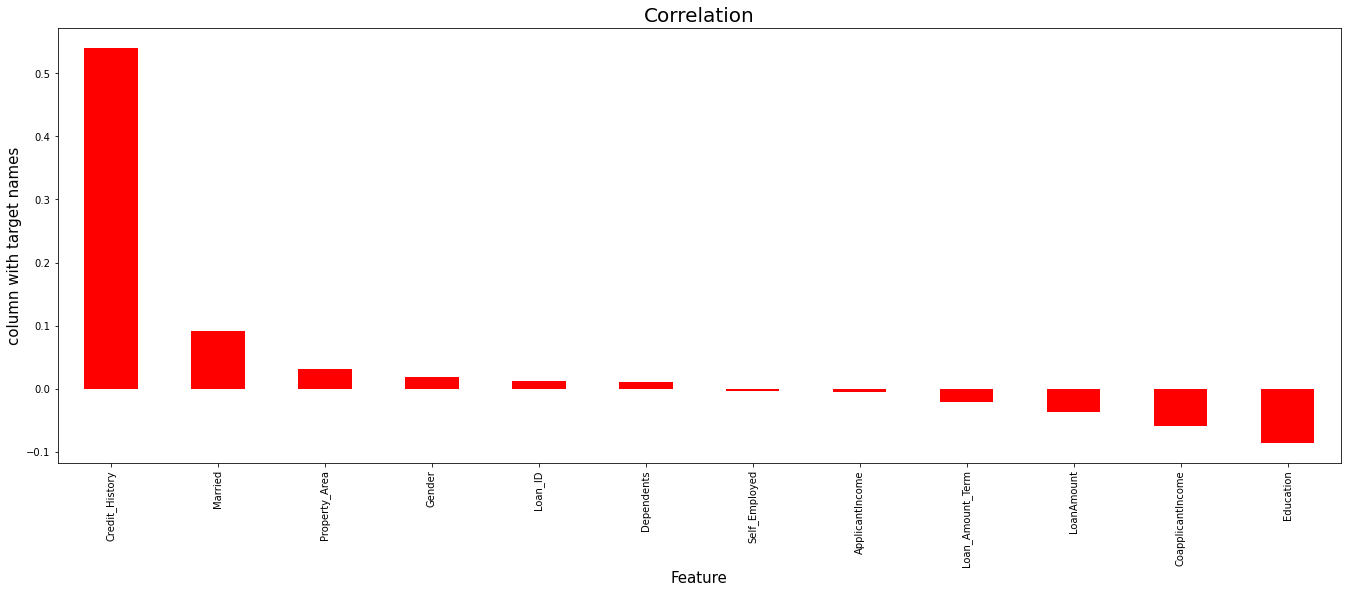

In [29]:
plt.figure(figsize=(23,8))
lp.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

In [30]:
lp.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

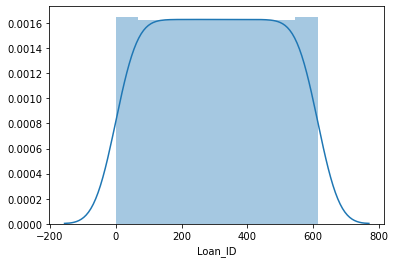

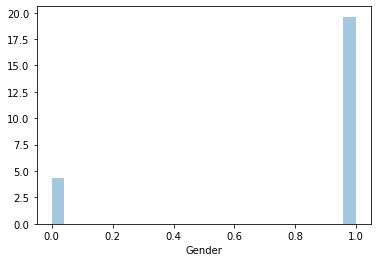

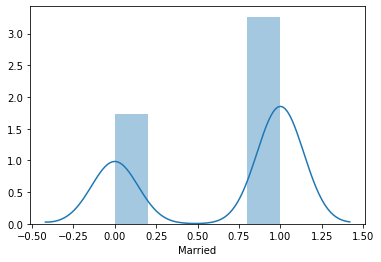

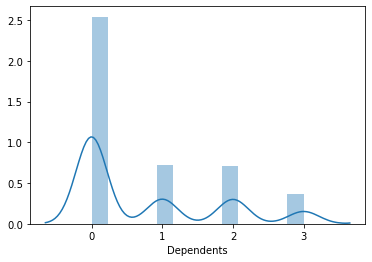

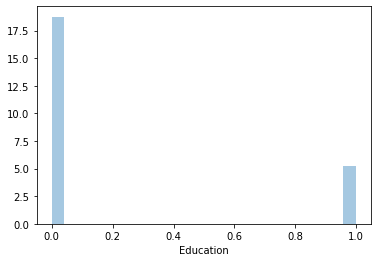

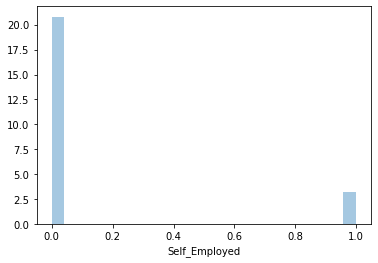

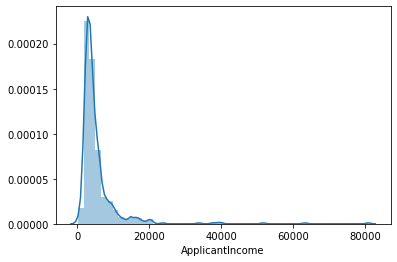

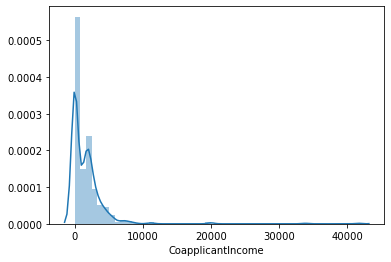

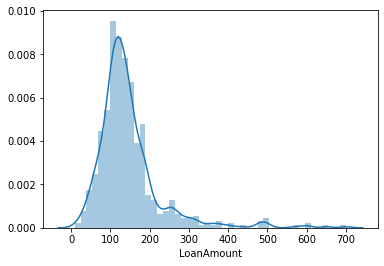

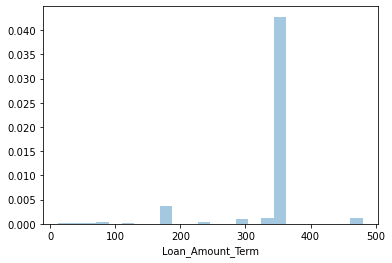

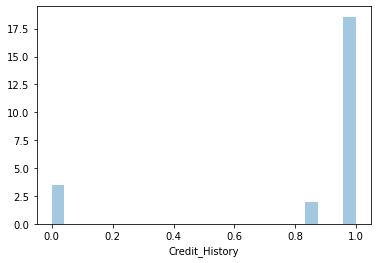

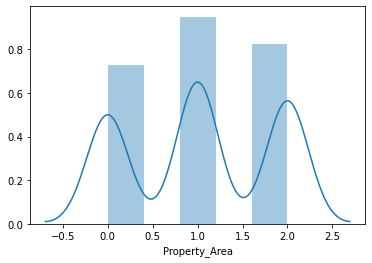

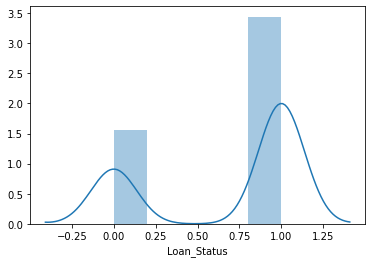

In [31]:
for k in lp.columns:
    plt.figure()
    sns.distplot(lp[k])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F0EB44850>,
      dtype=object)

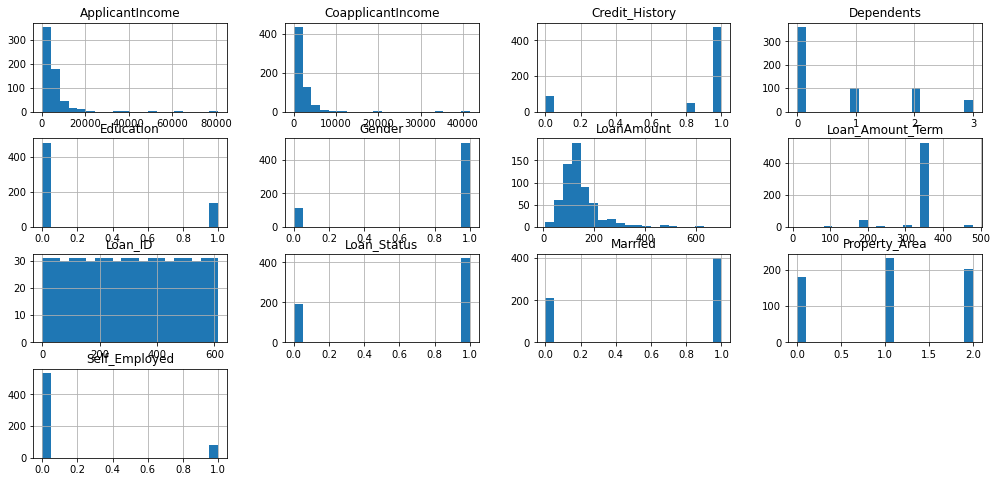

In [32]:
lp.hist(figsize=(17,8),grid=True,bins=20)

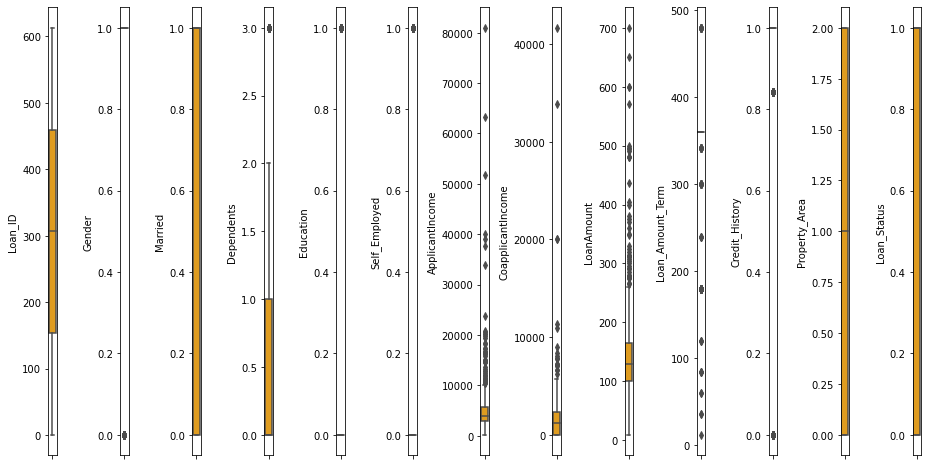

In [33]:
collist=lp.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(lp[collist[i]],color='orange',orient='v')
    plt.tight_layout()

In [46]:
lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [47]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(lp))
z.shape

(614, 13)

In [48]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
      dtype=int64))


In [49]:
lp_new=lp[(z<3).all(axis=1)]
print(lp.shape)
print(lp_new.shape)

(614, 13)
(577, 13)


In [50]:
loss_percent=(614-577)/614*100
print(loss_percent)

6.026058631921824


In [51]:
x=lp_new.iloc[:,:-1]
y=lp_new.iloc[:,-1]
print(x.shape)
print(y.shape)

(577, 12)
(577,)


In [52]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [53]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [54]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8115183246073299 on Random_state  1
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Ra

Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.8586387434554974 on Random_state  12
Best Accuracy is  0.85863874345

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.28,random_state=192)

In [56]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.845679012345679
[[ 27  23]
 [  2 110]]
              precision    recall  f1-score   support

         0.0       0.93      0.54      0.68        50
         1.0       0.83      0.98      0.90       112

    accuracy                           0.85       162
   macro avg       0.88      0.76      0.79       162
weighted avg       0.86      0.85      0.83       162



In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7160493827160493
[[25 25]
 [21 91]]
              precision    recall  f1-score   support

         0.0       0.54      0.50      0.52        50
         1.0       0.78      0.81      0.80       112

    accuracy                           0.72       162
   macro avg       0.66      0.66      0.66       162
weighted avg       0.71      0.72      0.71       162



In [58]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.845679012345679
[[ 26  24]
 [  1 111]]
              precision    recall  f1-score   support

         0.0       0.96      0.52      0.68        50
         1.0       0.82      0.99      0.90       112

    accuracy                           0.85       162
   macro avg       0.89      0.76      0.79       162
weighted avg       0.87      0.85      0.83       162



In [59]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8024691358024691
[[ 27  23]
 [  9 103]]
              precision    recall  f1-score   support

         0.0       0.75      0.54      0.63        50
         1.0       0.82      0.92      0.87       112

    accuracy                           0.80       162
   macro avg       0.78      0.73      0.75       162
weighted avg       0.80      0.80      0.79       162



In [60]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)
predgn=gn.predict(x_test)
print(accuracy_score(y_test,predgn))
print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

0.8333333333333334
[[ 31  19]
 [  8 104]]
              precision    recall  f1-score   support

         0.0       0.79      0.62      0.70        50
         1.0       0.85      0.93      0.89       112

    accuracy                           0.83       162
   macro avg       0.82      0.77      0.79       162
weighted avg       0.83      0.83      0.83       162



In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()                                                      #by default = 5
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7962962962962963
[[ 20  30]
 [  3 109]]
              precision    recall  f1-score   support

         0.0       0.87      0.40      0.55        50
         1.0       0.78      0.97      0.87       112

    accuracy                           0.80       162
   macro avg       0.83      0.69      0.71       162
weighted avg       0.81      0.80      0.77       162



In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8271604938271605
[[ 25  25]
 [  3 109]]
              precision    recall  f1-score   support

         0.0       0.89      0.50      0.64        50
         1.0       0.81      0.97      0.89       112

    accuracy                           0.83       162
   macro avg       0.85      0.74      0.76       162
weighted avg       0.84      0.83      0.81       162



In [63]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(lg,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8042278860569715


In [64]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dt,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.6502848575712143


In [65]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(svc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8146326836581709


In [66]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ab,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.69904047976012


In [67]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(gn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7764617691154423


In [68]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7660419790104946


In [69]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rfc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7834932533733134


minimum difference is accuracy and cross validation score is for KNeighborsClassifier() so this is our best model.

In [73]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[5,10,15,20]}
gcv= GridSearchCV(knn,params,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20]})

In [74]:
gcv.best_params_

{'n_neighbors': 10}

In [75]:
gcv.best_score_

0.7734939759036145

In [76]:
gcv.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)                                                      #by default = 5
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8333333333333334
[[ 25  25]
 [  2 110]]
              precision    recall  f1-score   support

         0.0       0.93      0.50      0.65        50
         1.0       0.81      0.98      0.89       112

    accuracy                           0.83       162
   macro avg       0.87      0.74      0.77       162
weighted avg       0.85      0.83      0.82       162



In [78]:
gcv_pred=gcv.best_estimator_.predict(x_test)

In [79]:
accuracy_score(gcv_pred,y_test)

0.8333333333333334

In [80]:
import joblib
joblib.dump(knn,'loanapplicationmodel.pkl')

['loanapplicationmodel.pkl']